<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/6_NN_DeepLearning/NN_intro_APIFuncional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
#from tensorflow import keras
print(tf.__version__)

2.5.0


In [2]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train
images = images/255

4423680/4422102 [==============================] - 0s 0us/step


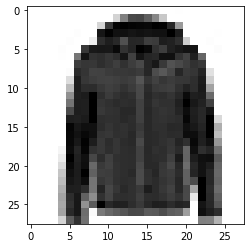

In [3]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [4]:
import numpy as np
print(np.unique(labels))
print(images.shape)

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [5]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
red1 (Dense)                 (None, 200)               157000    
_________________________________________________________________
hred2 (Dense)                (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


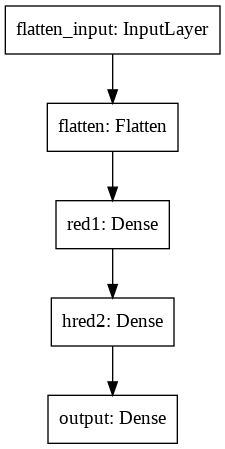

In [6]:
#definir arquitectura secuencial
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2])),
    tf.keras.layers.Dense(200,activation="relu", name='red1'),
    tf.keras.layers.Dense(50, activation="tanh",name='hred2'),
    tf.keras.layers.Dense(10,activation='softmax',name='output')
])

model.summary()
tf.keras.utils.plot_model(model)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
entrada (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
h1 (Dense)                   (None, 200)               157000    
_________________________________________________________________
h2 (Dense)                   (None, 50)                10050     
_________________________________________________________________
output (Dense)               (None, 10)                510       
Total params: 167,560
Trainable params: 167,560
Non-trainable params: 0
_________________________________________________________________


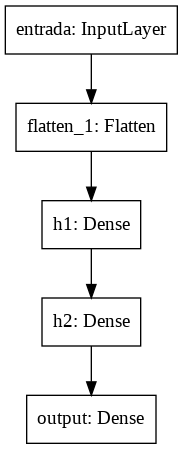

In [7]:
#arquitectura funcional
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
output = tf.keras.layers.Dense(10,activation="softmax",name='output')(h2)
model_fun = tf.keras.Model(inputs=input_l,outputs=output)
model_fun.summary()
tf.keras.utils.plot_model(model_fun)


# La API funcional permite realizar conexiones más flexibles

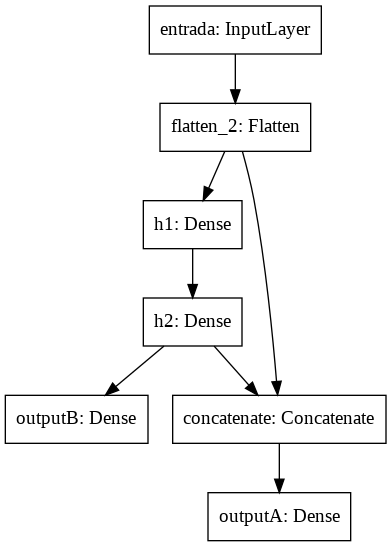

In [8]:
#arquitectura funcional 2 
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)
h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
concat = tf.keras.layers.concatenate([h2,flatten])
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [9]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics="accuracy") #f1, precision, recall, crossentropy


In [10]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_data=(Xtest, [ytest,ytest]))

Epoch 1/10
938/938 [==============================] - 7s 4ms/step - loss: 1.0177 - outputA_loss: 0.5250 - outputB_loss: 0.4927 - outputA_accuracy: 0.8164 - outputB_accuracy: 0.8247 - val_loss: 0.8604 - val_outputA_loss: 0.4348 - val_outputB_loss: 0.4256 - val_outputA_accuracy: 0.8417 - val_outputB_accuracy: 0.8452
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.7400 - outputA_loss: 0.3744 - outputB_loss: 0.3656 - outputA_accuracy: 0.8642 - outputB_accuracy: 0.8672 - val_loss: 0.8451 - val_outputA_loss: 0.4227 - val_outputB_loss: 0.4224 - val_outputA_accuracy: 0.8432 - val_outputB_accuracy: 0.8457
Epoch 3/10
938/938 [==============================] - 3s 4ms/step - loss: 0.6762 - outputA_loss: 0.3417 - outputB_loss: 0.3345 - outputA_accuracy: 0.8744 - outputB_accuracy: 0.8771 - val_loss: 0.7447 - val_outputA_loss: 0.3737 - val_outputB_loss: 0.3709 - val_outputA_accuracy: 0.8655 - val_outputB_accuracy: 0.8684
Epoch 4/10
938/938 [==============================] 

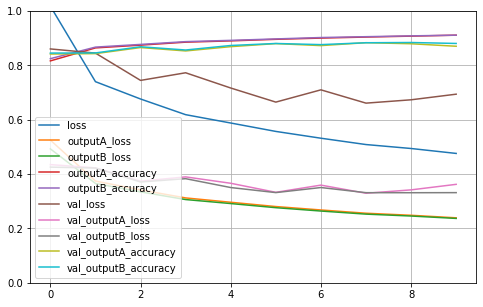

In [11]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [12]:
yestA,yestB = model_fun.predict(Xtest)

In [13]:
print(yestA[0].argmax(),ytest[0])


9 9


# Grafiquemos los pesos respecto a las dimensiones de la imagen original

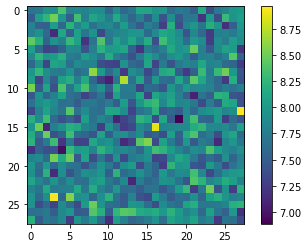

In [14]:
plt.imshow(abs(model.layers[1].get_weights()[0]).sum(axis=1).reshape(28,28))
plt.colorbar()
plt.show()

In [15]:
model.layers[1].get_weights()[1].shape # accediendo  a pesos por lista

(200,)

# Salidas parciales de la red

Nos permite identificar que ve la red en etapas intermedias

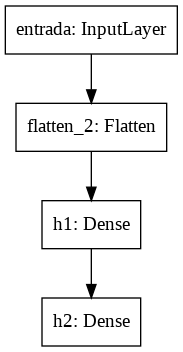

In [16]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('h2').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modleo ya esta ajustado!


In [17]:
z = model_B.predict(Xtrain) # salida en h2
z.shape


(60000, 50)

# Dado que se fijaron 50 unidades, se puede utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D

In [18]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(60000, 2)

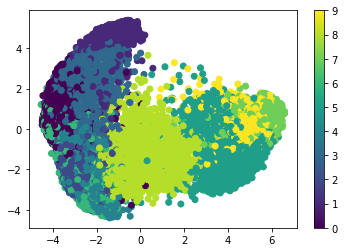

In [19]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytrain)
plt.colorbar()
plt.show()

In [20]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

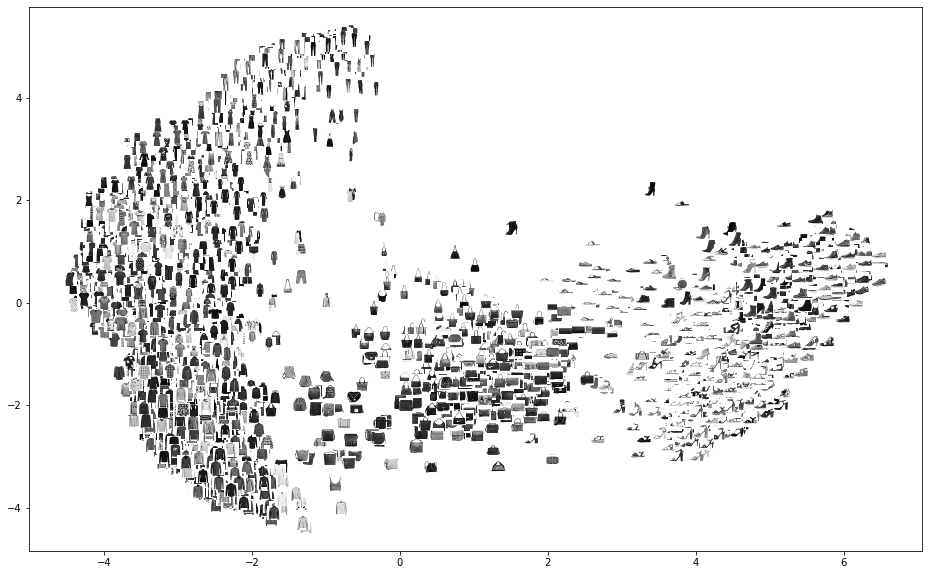

In [21]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytrain.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytrain[ind],Xtrain[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')